In [1]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Freaky\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
DATASET_DIR = "C:\\Users\\Freaky\\Desktop\\dissertation\\covid-19 python\\Dataset"

In [3]:
os.listdir(DATASET_DIR)

['Covid', 'Normal']

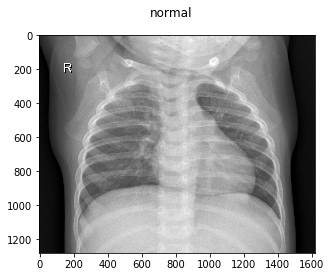

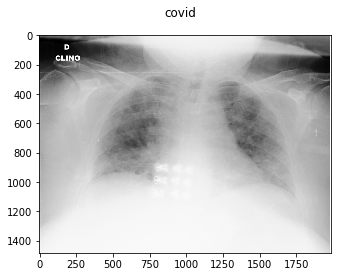

In [4]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray') 

In [8]:
# Print how many normal and covid images there are in the dataset
print(len(normal_images))
print(len(covid_images))

206
204


In [9]:
# Building the model / CNN Based Model in Keras
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        18496     
__________

In [27]:
# Data Augmentation 
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=(0.3)
    input_shade=(224,224,3)
# Train
train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training')
# Validation 
validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    shuffle= False,
    subset='validation')
# CNN 
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 12,
    validation_data = validation_generator, 
    validation_steps = 4,
    epochs = 16)

Found 288 images belonging to 2 classes.
Found 122 images belonging to 2 classes.
Epoch 1/16
12/12 [==============================] - 67s 6s/step - loss: 0.0755 - acc: 0.9766 - val_loss: 0.0722 - val_acc: 0.9754
Epoch 2/16
12/12 [==============================] - 62s 5s/step - loss: 0.2336 - acc: 0.9375 - val_loss: 0.0868 - val_acc: 0.9672
Epoch 3/16
12/12 [==============================] - 65s 5s/step - loss: 0.0448 - acc: 0.9818 - val_loss: 0.1288 - val_acc: 0.9836
Epoch 4/16
12/12 [==============================] - 63s 5s/step - loss: 0.0535 - acc: 0.9870 - val_loss: 0.1093 - val_acc: 0.9508
Epoch 5/16
12/12 [==============================] - 66s 6s/step - loss: 0.0485 - acc: 0.9896 - val_loss: 0.2037 - val_acc: 0.9508
Epoch 6/16
12/12 [==============================] - 65s 5s/step - loss: 0.0989 - acc: 0.9688 - val_loss: 0.0440 - val_acc: 0.9836
Epoch 7/16
12/12 [==============================] - 62s 5s/step - loss: 0.0743 - acc: 0.9844 - val_loss: 0.3143 - val_acc: 0.9426
Epoch 8/

In [25]:
history.history

NameError: name 'history' is not defined

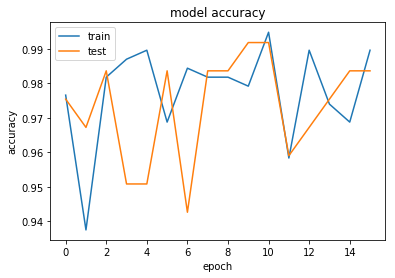

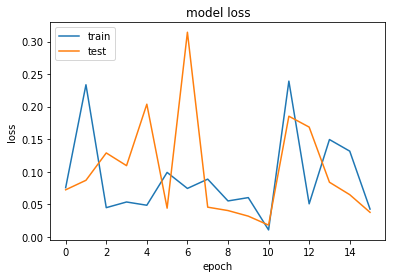

In [30]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
print("training_accuracy", history.history['acc'][-1])
print("validation_accuracy", history.history['val_acc'][-1])

NameError: name 'history' is not defined

In [32]:
# Evaluate CNN
print("Accuracy Test -  ", model.evaluate_generator(validation_generator)[1]*100, '%')

Accuracy Test -   98.36065573770492 %


In [33]:
# Class Activation Maps (confusion matrix)

In [34]:
label = validation_generator.classes

In [35]:
pred = model.predict_generator(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
{'Normal': 1, 'Covid': 0}
['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Cov

In [36]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_class_indices,label)
cf

array([[61, 61],
       [ 0,  0]], dtype=int64)

In [37]:
exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,All
Actual,,
0,61,61
1,61,61
All,122,122


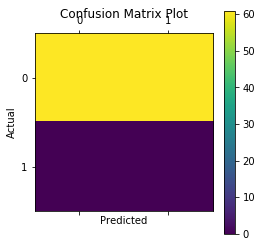

In [38]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [ ]:
y_test = validation_generator.classes

In [46]:
y_pred = model.predict_generator(validation_generator)
y_pred = np.around(y_pred, decimals=0)

In [47]:
#Classification report from confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred, target_names=['Covid-19','Normal']))

             precision    recall  f1-score   support

   Covid-19       1.00      0.97      0.98        61
     Normal       0.97      1.00      0.98        61

avg / total       0.98      0.98      0.98       122



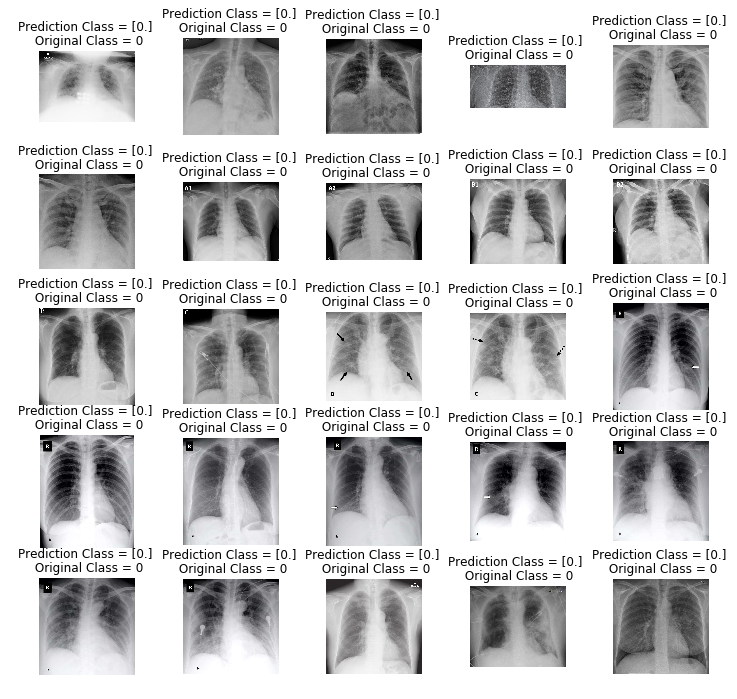

In [53]:
fig, axs = plt.subplots(5, 5, figsize=(12,12))
axs=axs.ravel()

for i in range(0,25):  
    axs[i].imshow(covid_images[i], cmap='gray')
    axs[i].set_title("Prediction Class = {} \n Original Class = {}".format(y_pred[i], y_test[i]))
    axs[i].axis('off')
plt.subplots_adjust(wspace=0.5)

Text(0.5,1,'Normal')

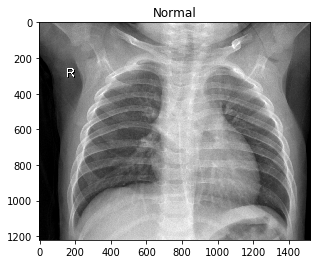

In [13]:
#Normal image
plt.imshow(normal_images[11], cmap='gray')
plt.title('Normal')

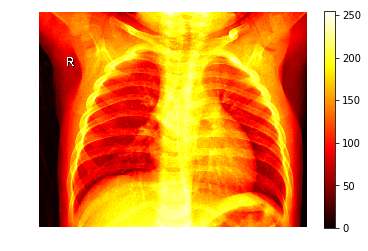

In [14]:
#Normal image
plt.imshow(normal_images[11], cmap='hot')
plt.axis('off')
plt.colorbar()

Text(0.5,1,'Covid')

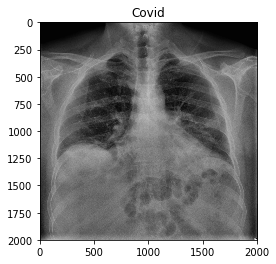

In [15]:
#Covid image
plt.imshow(covid_images[2], cmap='gray')
plt.title('Covid')

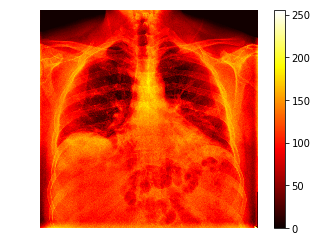

In [16]:
#Covid image
plt.imshow(covid_images[2], cmap='hot')
plt.axis('off')
plt.colorbar()